In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3e60ecff-d177-4bbe-b637-98fb09001f0a/Cricket.csv", encoding = "ISO-8859-1")
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
career_data = pd.DataFrame(data['Span'].str.split('-', 1).tolist(), columns=['startYear', 'endYear'])
career_data.startYear = career_data.startYear.astype('int')
career_data.endYear = career_data.endYear.astype('int')
data = pd.concat([data, career_data], axis=1)
data.drop(columns=['Span'], axis=1, inplace=True)
data.HS = data.HS.replace('\*','',regex=True).astype('float')
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear
0,SR Tendulkar (INDIA),463,452,41,18426,200.0,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169.0,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),375,365,39,13704,164.0,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189.0,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144.0,33.37,16020,78.96,19,77,28,1998,2015


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Player'], axis=1))
scaled_data = pd.DataFrame(scaled_data) 
scaled_data.columns = data.columns.drop('Player')
scaled_data.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,-0.670308,0.468281
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.621261,0.864648
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.034184,0.468281
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,-0.670308,0.336159
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.386430,0.864648


### Modeling: 

In [5]:
_cluster = KMeans(n_clusters=4, random_state=100, max_iter=50)
_cluster.fit(scaled_data[['SR', 'Ave']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [6]:
_cluster.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [7]:
all_columns = data.columns.tolist()
all_columns.append('Category')
result = pd.concat([data, pd.Series(_cluster.labels_)], axis=1)
result.columns = all_columns
result.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
0,SR Tendulkar (INDIA),463,452,41,18426,200.0,44.83,21367,86.23,49,96,20,1989,2012,3
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169.0,41.98,18048,78.86,25,93,15,2000,2015,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164.0,42.03,17046,80.39,30,82,20,1995,2012,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189.0,32.36,14725,91.20,28,68,34,1989,2011,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144.0,33.37,16020,78.96,19,77,28,1998,2015,2


In [8]:
result[ result.Player == 'V Kohli\xa0(INDIA)' ]
# result[ result.Category == 3 ]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
25,V Kohli (INDIA),188,180,29,8146,183.0,53.94,8952,90.99,27,43,11,2008,2017,3


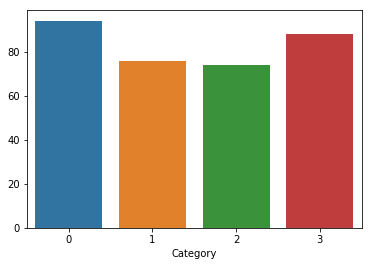

In [9]:
import seaborn as sns
df = result.groupby('Category').SR.mean()
sns.barplot(x=df.index, y=df.values)

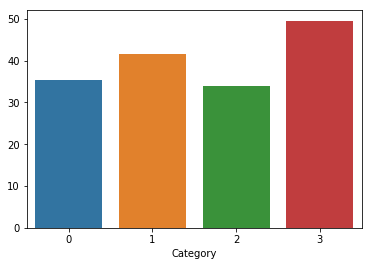

In [10]:
df = result.groupby('Category').Ave.mean()
sns.barplot(x=df.index, y=df.values)

In [11]:
result[ result.Category == 3 ]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
0,SR Tendulkar (INDIA),463,452,41,18426,200.0,44.83,21367,86.23,49,96,20,1989,2012,3
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183.0,51.32,10706,88.69,10,64,8,2004,2017,3
15,AB de Villiers (Afr/SA),222,213,39,9319,162.0,53.55,9295,100.25,24,53,7,2005,2017,3
25,V Kohli (INDIA),188,180,29,8146,183.0,53.94,8952,90.99,27,43,11,2008,2017,3
34,HM Amla (SA),156,153,10,7186,159.0,50.25,8069,89.05,25,33,3,2008,2017,3
38,MG Bevan (AUS),232,196,67,6912,108.0,53.58,9320,74.16,6,46,5,1994,2004,3
42,IVA Richards (WI),187,167,24,6721,189.0,47.00,7451,90.20,11,45,7,1975,1991,3
63,MJ Guptill (NZ),146,143,16,5500,237.0,43.30,6269,87.73,12,32,12,2009,2017,3
64,MEK Hussey (AUS),185,157,44,5442,109.0,48.15,6243,87.16,3,39,3,2004,2012,3


In [12]:
result[ result.Category == 0 ]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189.0,32.36,14725,91.20,28,68,34,1989,2011,0
10,TM Dilshan (SL),330,303,41,10290,161.0,39.27,11933,86.23,22,47,11,1999,2016,0
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172.0,35.89,9922,96.94,16,55,19,1996,2008,0
17,CH Gayle (ICC/WI),269,264,17,9221,215.0,37.33,10834,85.11,22,47,23,1999,2015,0
20,Yuvraj Singh (Asia/INDIA),304,278,40,8701,150.0,36.55,9924,87.67,14,52,18,2000,2017,0
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219.0,35.05,7929,104.33,15,38,14,1999,2013,0
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124.0,23.57,6892,117.00,6,39,30,1996,2015,0
50,BB McCullum (NZ),260,228,28,6083,166.0,30.41,6312,96.37,5,32,20,2002,2016,0
57,EJG Morgan (ENG/IRE),185,174,25,5772,124.0,38.73,6513,88.62,11,34,12,2006,2017,0
59,SR Watson (AUS),190,169,27,5757,185.0,40.54,6365,90.44,9,33,12,2002,2015,0


In [13]:
result[ result.Category == 2 ]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144.0,33.37,16020,78.96,19,77,28,1998,2015,2
14,M Azharuddin (INDIA),334,308,54,9378,153.0,36.92,12669,74.02,7,58,9,1985,2000,2
16,PA de Silva (SL),308,296,30,9284,145.0,34.90,11443,81.13,11,64,17,1984,2003,2
22,MS Atapattu (SL),268,259,32,8529,132.0,37.57,12594,67.72,11,59,13,1990,2007,2
26,HH Gibbs (SA),248,240,16,8094,175.0,36.13,9721,83.26,21,37,22,1996,2010,2
28,SP Fleming (ICC/NZ),280,269,21,8037,134.0,32.40,11242,71.49,8,49,17,1994,2007,2
30,SR Waugh (AUS),325,288,58,7569,120.0,32.90,9971,75.91,3,45,15,1986,2002,2
31,A Ranatunga (SL),269,255,47,7456,131.0,35.84,9571,77.90,4,49,18,1982,1999,2
33,Younis Khan (PAK),265,255,23,7249,144.0,31.24,9628,75.29,7,48,22,2000,2015,2
35,Saleem Malik (PAK),283,256,38,7170,102.0,32.88,9383,76.41,5,47,19,1982,1999,2


In [14]:
result[ result.Category == 1 ]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169.0,41.98,18048,78.86,25,93,15,2000,2015,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164.0,42.03,17046,80.39,30,82,20,1995,2012,1
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137.0,39.52,15812,74.24,10,83,20,1991,2007,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139.0,44.36,15885,72.89,17,86,17,1996,2014,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183.0,41.02,15416,73.70,22,72,16,1992,2007,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153.0,39.16,15284,71.24,12,83,13,1996,2011,1
9,BC Lara (ICC/WI),299,289,32,10405,169.0,40.48,13086,79.51,19,63,16,1990,2007,1
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141.0,41.71,12942,75.10,15,64,15,1998,2010,1
18,Saeed Anwar (PAK),247,244,19,8824,194.0,39.21,10938,80.67,20,43,15,1989,2003,1
19,S Chanderpaul (WI),268,251,40,8778,150.0,41.60,12408,70.74,11,59,6,1994,2011,1


## Hierarichal clustering:

In [15]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

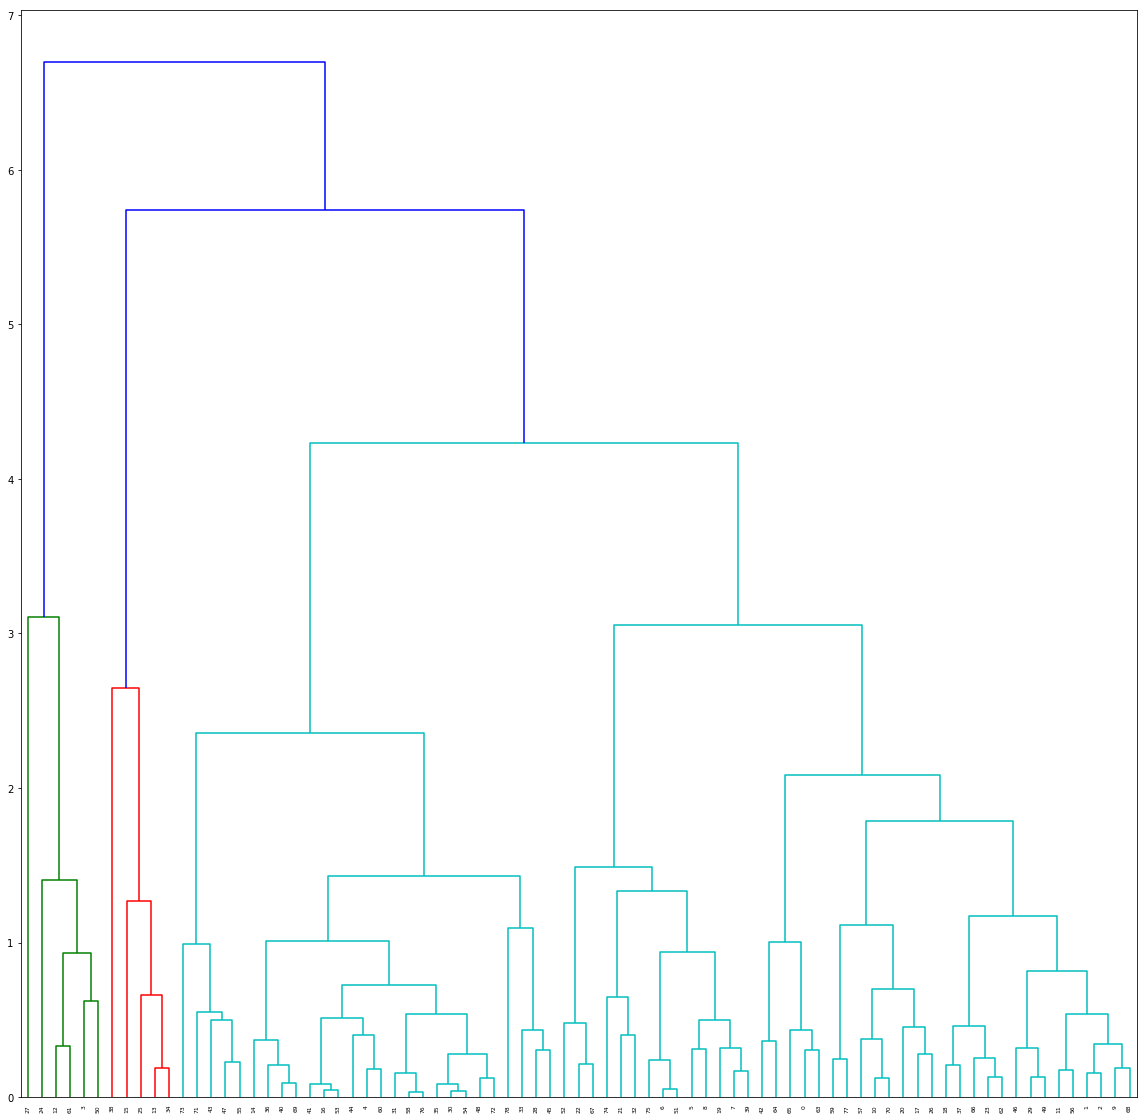

In [18]:
plt.figure(figsize=(20, 20))
mergings = linkage(scaled_data[['SR', 'Ave']], method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [22]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
hierarical_result = pd.concat([data, clusterCut], axis=1)
hierarical_result.columns = all_columns
hierarical_result.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
0,SR Tendulkar (INDIA),463,452,41,18426,200.0,44.83,21367,86.23,49,96,20,1989,2012,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169.0,41.98,18048,78.86,25,93,15,2000,2015,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164.0,42.03,17046,80.39,30,82,20,1995,2012,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189.0,32.36,14725,91.20,28,68,34,1989,2011,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144.0,33.37,16020,78.96,19,77,28,1998,2015,2


In [23]:
hierarical_result[hierarical_result.Category == 0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,startYear,endYear,Category
0,SR Tendulkar (INDIA),463,452,41,18426,200.0,44.83,21367,86.23,49,96,20,1989,2012,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169.0,41.98,18048,78.86,25,93,15,2000,2015,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164.0,42.03,17046,80.39,30,82,20,1995,2012,0
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137.0,39.52,15812,74.24,10,83,20,1991,2007,0
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139.0,44.36,15885,72.89,17,86,17,1996,2014,0
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183.0,41.02,15416,73.70,22,72,16,1992,2007,0
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153.0,39.16,15284,71.24,12,83,13,1996,2011,0
9,BC Lara (ICC/WI),299,289,32,10405,169.0,40.48,13086,79.51,19,63,16,1990,2007,0
10,TM Dilshan (SL),330,303,41,10290,161.0,39.27,11933,86.23,22,47,11,1999,2016,0
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141.0,41.71,12942,75.10,15,64,15,1998,2010,0
